In [68]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [106]:
ROWS, COLS = 100, 100
ACTIONS = ['up', 'down', 'left', 'right']
REWARD_GOAL = 10000
REWARD_DEFAULT = -1
DISCOUNT_FACTOR = 0.9
ITERATIONS = 5000

In [107]:
grid = np.full((ROWS, COLS), REWARD_DEFAULT)

In [108]:
start_state = (0, 0) 
goal_state = (ROWS - 1, COLS - 1)
grid[goal_state] = REWARD_GOAL

In [109]:
obstacle_count = int(0.07 * ROWS * COLS) 
obstacles = set()
while len(obstacles) < obstacle_count:
    obstacle = (random.randint(0, ROWS - 1), random.randint(0, COLS - 1))
    if obstacle != start_state and obstacle != goal_state:
        obstacles.add(obstacle)
for obs in obstacles:
    grid[obs] = -100

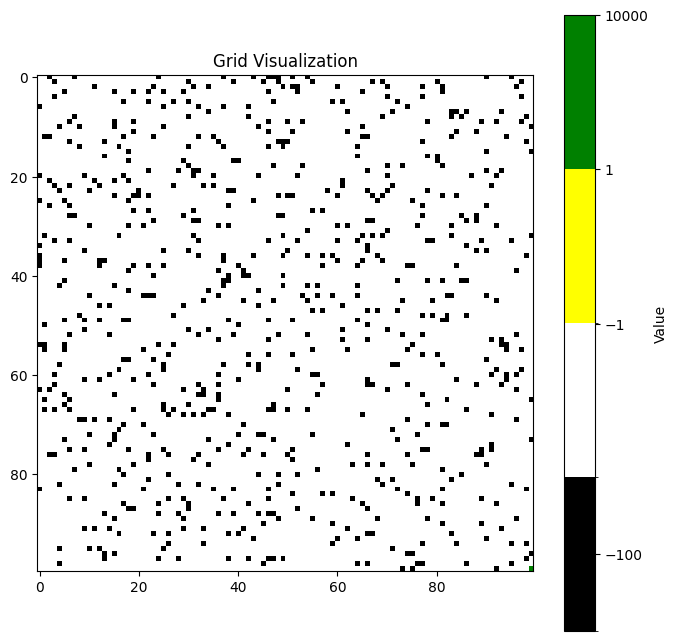

In [110]:
cmap = mcolors.ListedColormap(['black', 'white', 'yellow', 'green'])
bounds = [-100.5, -99.5, -0.5, 0.5, 10000.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap=cmap, norm=norm, origin='upper')
plt.title('Grid Visualization')
plt.colorbar(ticks=[-100, -1, 1, 10000], label='Value')
plt.show()

In [111]:
def is_valid_state(state):
    return (0 <= state[0] < ROWS) and (0 <= state[1] < COLS) and (state not in obstacles)

# Function to get next state based on action
def get_next_state(state, action):
    if action == 'up':
        return (state[0] - 1, state[1])
    elif action == 'down':
        return (state[0] + 1, state[1])
    elif action == 'left':
        return (state[0], state[1] - 1)
    elif action == 'right':
        return (state[0], state[1] + 1)


In [112]:
values = np.zeros((ROWS, COLS))
values[goal_state] = REWARD_GOAL


In [113]:
for _ in range(ITERATIONS):
    new_values = np.copy(values)
    for row in range(ROWS):
        for col in range(COLS):
            state = (row, col)
            if state == goal_state or state in obstacles:
                continue
            
            # Calculate the maximum utility for this state
            max_value = float("-inf")
            for action in ACTIONS:
                next_state = get_next_state(state, action)
                if is_valid_state(next_state):
                    intended_value = values[next_state] * 0.8
                    right_angle_value = values[state] * 0.1
                    opposite_value = values[state] * 0.1
                    action_value = REWARD_DEFAULT + DISCOUNT_FACTOR * (intended_value + right_angle_value + opposite_value)
                    max_value = max(max_value, action_value)
            new_values[state] = max_value
    values = new_values

In [114]:
policy = np.full((ROWS, COLS), '', dtype=object)
for row in range(ROWS):
    for col in range(COLS):
        state = (row, col)
        if state == goal_state or state in obstacles:
            policy[state] = 'GOAL' if state == goal_state else 'X'  # Mark goal and obstacles
            continue
        
        # Determine the best action for this state
        best_action = None
        max_value = float("-inf")
        for action in ACTIONS:
            next_state = get_next_state(state, action)
            if is_valid_state(next_state):
                intended_value = values[next_state] * 0.8
                right_angle_value = values[state] * 0.1
                opposite_value = values[state] * 0.1
                action_value = REWARD_DEFAULT + DISCOUNT_FACTOR * (intended_value + right_angle_value + opposite_value)
                
                if action_value > max_value:
                    max_value = action_value
                    best_action = action
        policy[state] = best_action

In [115]:
policy.shape

(100, 100)

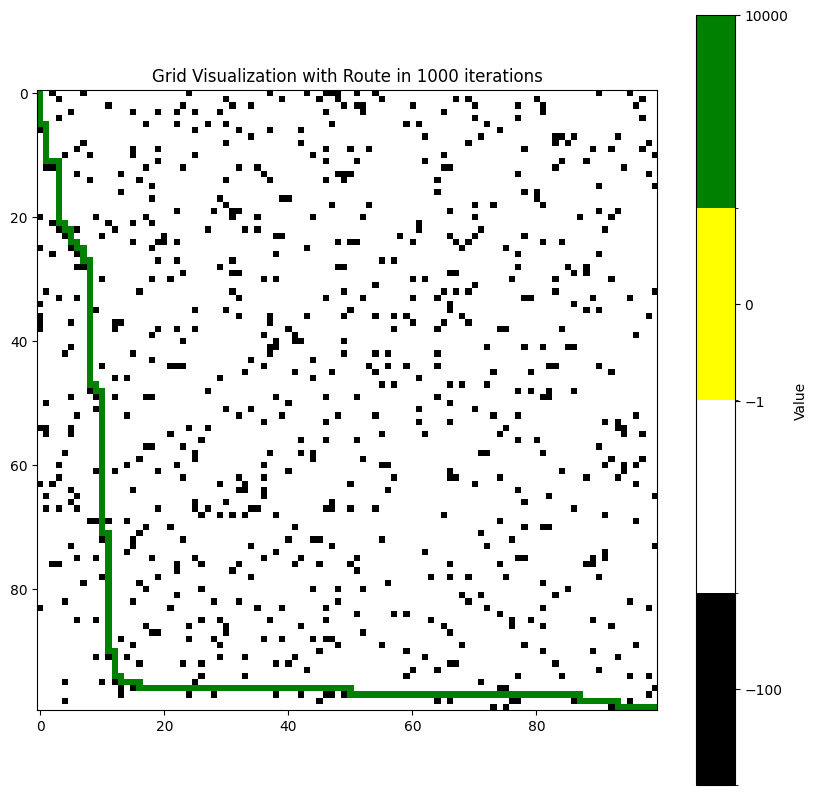

In [116]:
start_state = (0, 0)
goal_state = (99, 99)

route = [start_state]
current_state = start_state

while current_state != goal_state:
    action = policy[current_state]
    if action == 'up':
        next_state = (current_state[0] - 1, current_state[1])
    elif action == 'down':
        next_state = (current_state[0] + 1, current_state[1])
    elif action == 'left':
        next_state = (current_state[0], current_state[1] - 1)
    elif action == 'right':
        next_state = (current_state[0], current_state[1] + 1)
    
    if next_state in route:  # Stop if we detect a loop (to prevent infinite loops)
        print("Loop detected in policy; stopping.")
        break
    
    route.append(next_state)
    current_state = next_state
    
updated_grid = np.copy(grid)

for state in route:
    updated_grid[state] = 1
    
plt.figure(figsize=(10, 10))
plt.imshow(updated_grid, cmap=cmap, norm=norm, origin='upper')
plt.title('Grid Visualization with Route in 1000 iterations')
plt.colorbar(ticks=[-100, -1, 0, 10000], label='Value')
plt.show()